Some first trial. For some initial checks, I used ChatGPT. And I struggled with it (with her) back and forth with answers and corrections. She became more human, and I more machine.

In [2]:
# from_numpy_array

[array([[0.  , 0.5 , 0.08, 0.15],
       [0.08, 0.  , 0.14, 1.  ],
       [0.5 , 0.15, 0.  , 0.05],
       [0.7 , 0.4 , 0.9 , 0.  ]]), array([[0.  , 0.1 , 0.04, 0.05],
       [0.04, 0.  , 0.01, 0.1 ],
       [0.1 , 0.05, 0.  , 0.05],
       [0.1 , 0.1 , 0.1 , 0.  ]]), array([[0. , 1. , 0.4, 0.5],
       [0.4, 0. , 0.1, 1. ],
       [1. , 0.5, 0. , 0.5],
       [1. , 1. , 1. , 0. ]]), array([[0.  , 0.5 , 0.08, 0.15],
       [0.08, 0.  , 0.12, 1.  ],
       [0.5 , 0.15, 0.  , 0.05],
       [0.7 , 0.4 , 0.9 , 0.  ]])]


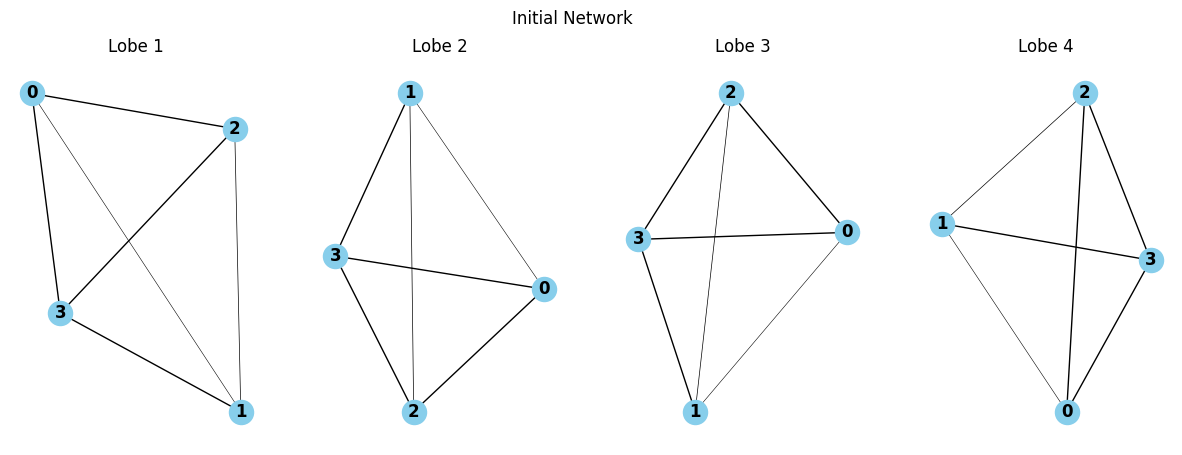

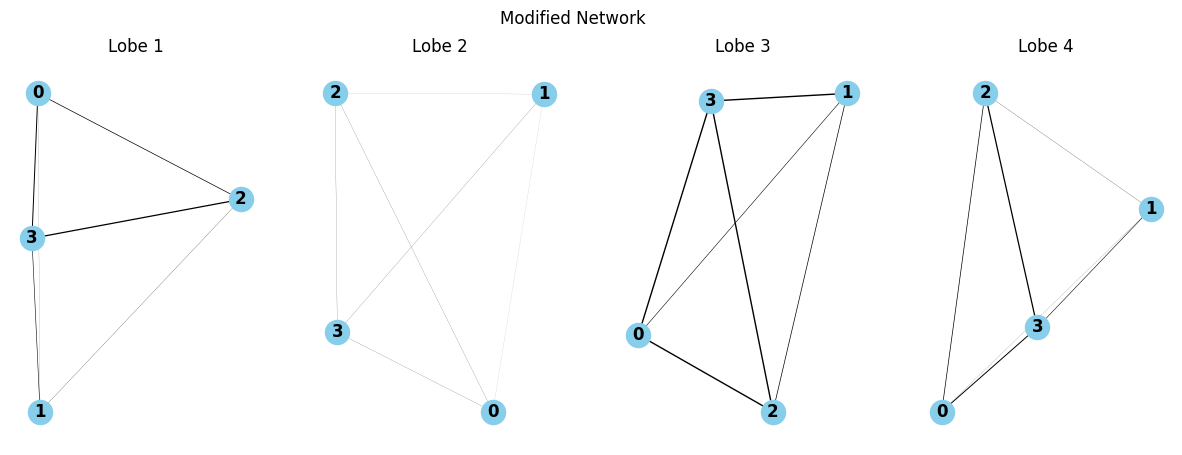

In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def create_initial_adjacency_tensor(num_nodes):
    initial_adjacency_tensor = []
    for _ in range(num_nodes):
        initial_matrix = np.array([[0, 1, 0.4, 0.5], [0.4, 0, 0.1, 1], [1, 0.5, 0, 0.5], [1, 1, 1, 0]])
        initial_adjacency_tensor.append(initial_matrix)
    return initial_adjacency_tensor

def modify_adjacency_tensor(adjacency_tensor, modifying_tensors):
    modified_adjacency_tensor = []
    for i, initial_matrix in enumerate(adjacency_tensor):
        modifying_matrix = modifying_tensors[i]

        # Ensure the modifying matrix has the same shape as the initial matrix
        if modifying_matrix.shape != initial_matrix.shape:
            raise ValueError(f"Shapes of modifying matrix and initial matrix do not match for node {i + 1}.")

        # Apply modifications
        modified_matrix = initial_matrix * modifying_matrix
        modified_adjacency_tensor.append(modified_matrix)

    return modified_adjacency_tensor

def visualize_network(adjacency_tensor, title):
    num_nodes = len(adjacency_tensor)

    # Create a graph for each layer
    graphs = [nx.from_numpy_array(adjacency_tensor[i]) for i in range(num_nodes)]

    # Plot the graphs
    plt.figure(figsize=(15, 5))
    plt.suptitle(title)

    for i in range(num_nodes):
        plt.subplot(1, num_nodes, i + 1)
        G = graphs[i]
        pos = nx.spring_layout(G)
        edge_weights = nx.get_edge_attributes(G, 'weight')
        normalized_edge_weights = [weight / max(edge_weights.values()) for weight in edge_weights.values()]
        nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', width=list(edge_weights.values()))
        plt.title(f"Lobe {i + 1}") # Node

    plt.show()

# Number of nodes
num_nodes = 4

# Create the initial adjacency tensor
initial_adjacency_tensor = create_initial_adjacency_tensor(num_nodes)

# Define modifying tensors for each layer
modifying_tensors = [
    np.array([[0.8, 0.5, 0.2, 0.3], [0.2, 0.7, 1.4, 1.0], [0.5, 0.3, 0.8, 0.1], [0.7, 0.4, 0.9, 0.5]]),
    np.array([[0.1, 0.1, 0.1, 0.1], [0.1, 0.1, 0.1, 0.1], [0.1, 0.1, 0.1, 0.1], [0.1, 0.1, 0.1, 0.1]]),
    np.array([[1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1]]), # the identity matrix
    np.array([[0.8, 0.5, 0.2, 0.3], [0.2, 0.7, 1.2, 1.0], [0.5, 0.3, 0.8, 0.1], [0.7, 0.4, 0.9, 0.5]])
]

# Make sure the number of modifying tensors matches the number of nodes
if len(modifying_tensors) != num_nodes:
    raise ValueError(f"The number of modifying tensors ({len(modifying_tensors)}) must match the number of nodes ({num_nodes}).")

# Adjust the shape of the modifying matrix for the first layer
modifying_tensors[0] = modifying_tensors[0][:initial_adjacency_tensor[0].shape[0], :]

# Modify the adjacency tensor
modified_adjacency_tensor = modify_adjacency_tensor(initial_adjacency_tensor, modifying_tensors)
print(modified_adjacency_tensor)

# Visualize the initial and modified networks
visualize_network(initial_adjacency_tensor, "Initial Network")
visualize_network(modified_adjacency_tensor, "Modified Network")


[array([[0.  , 0.5 , 0.08, 0.15],
       [0.08, 0.  , 0.14, 1.  ],
       [0.5 , 0.15, 0.  , 0.05],
       [0.7 , 0.4 , 0.9 , 0.  ]]), array([[0.  , 0.1 , 0.04, 0.05],
       [0.04, 0.  , 0.01, 0.1 ],
       [0.1 , 0.05, 0.  , 0.05],
       [0.1 , 0.1 , 0.1 , 0.  ]]), array([[0. , 1. , 0.4, 0.5],
       [0.4, 0. , 0.1, 1. ],
       [1. , 0.5, 0. , 0.5],
       [1. , 1. , 1. , 0. ]]), array([[0.  , 0.5 , 0.08, 0.15],
       [0.08, 0.  , 0.12, 1.  ],
       [0.5 , 0.15, 0.  , 0.05],
       [0.7 , 0.4 , 0.9 , 0.  ]])]


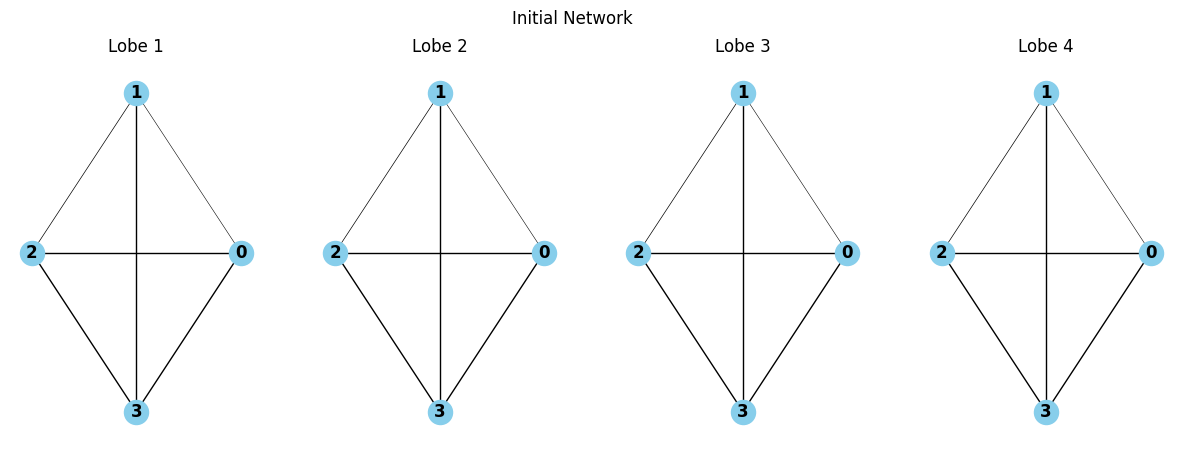

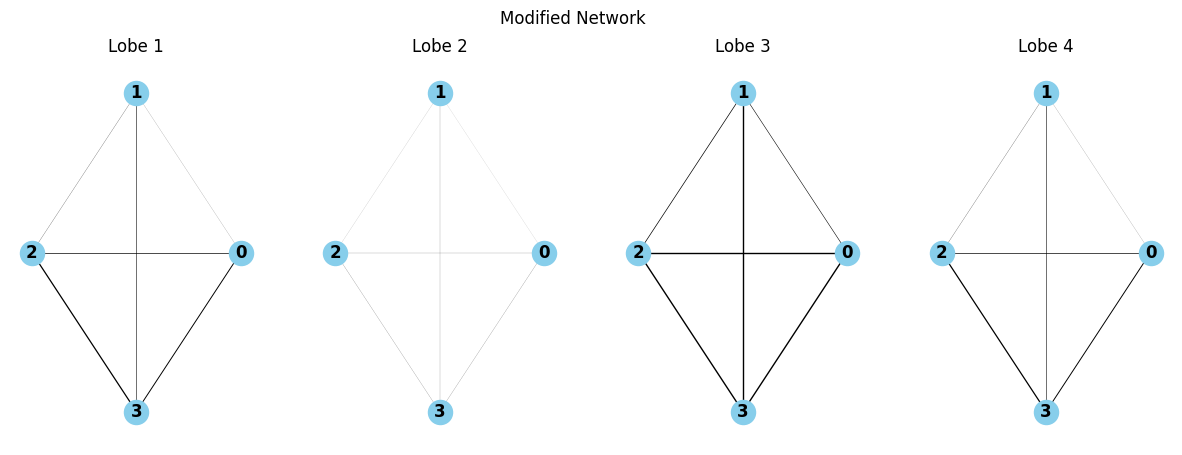

In [52]:
# TRYING TO FIX THE VISUALIZATION

def visualize_network(adjacency_tensor, title):
    num_nodes = len(adjacency_tensor)

    # Create a graph for each layer
    graphs = [nx.from_numpy_array(adjacency_tensor[i]) for i in range(num_nodes)]

    # Define positions for nodes (e.g., circular layout)
    positions = nx.circular_layout(graphs[0])

    # Plot the graphs
    plt.figure(figsize=(15, 5))
    plt.suptitle(title)

    for i in range(num_nodes):
        plt.subplot(1, num_nodes, i + 1)
        G = graphs[i]
        pos = positions  # Use the predefined positions
        edge_weights = nx.get_edge_attributes(G, 'weight')
        normalized_edge_weights = [weight / max(edge_weights.values()) for weight in edge_weights.values()]
        nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', width=list(edge_weights.values()))
        plt.title(f"Lobe {i + 1}")

    plt.show()

    # Number of nodes
num_nodes = 4

# Create the initial adjacency tensor
initial_adjacency_tensor = create_initial_adjacency_tensor(num_nodes)

# Define modifying tensors for each layer
modifying_tensors = [
    np.array([[0.8, 0.5, 0.2, 0.3], [0.2, 0.7, 1.4, 1.0], [0.5, 0.3, 0.8, 0.1], [0.7, 0.4, 0.9, 0.5]]),
    np.array([[0.1, 0.1, 0.1, 0.1], [0.1, 0.1, 0.1, 0.1], [0.1, 0.1, 0.1, 0.1], [0.1, 0.1, 0.1, 0.1]]),
    np.array([[1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1]]), # the identity matrix
    np.array([[0.8, 0.5, 0.2, 0.3], [0.2, 0.7, 1.2, 1.0], [0.5, 0.3, 0.8, 0.1], [0.7, 0.4, 0.9, 0.5]])
]

# Make sure the number of modifying tensors matches the number of nodes
if len(modifying_tensors) != num_nodes:
    raise ValueError(f"The number of modifying tensors ({len(modifying_tensors)}) must match the number of nodes ({num_nodes}).")

# Adjust the shape of the modifying matrix for the first layer
modifying_tensors[0] = modifying_tensors[0][:initial_adjacency_tensor[0].shape[0], :]

# Modify the adjacency tensor
modified_adjacency_tensor = modify_adjacency_tensor(initial_adjacency_tensor, modifying_tensors)
print(modified_adjacency_tensor)

# Visualize the initial and modified networks
visualize_network(initial_adjacency_tensor, "Initial Network")
visualize_network(modified_adjacency_tensor, "Modified Network")


# Trying to improve the resolution

import matplotlib.pyplot as plt
import networkx as nx

# Define a function to visualize a network with higher resolution
def visualize_network_new(adjacency_tensor, title, dpi=300):
    num_nodes = len(adjacency_tensor)

    # Create a graph for each layer
    graphs = [nx.from_numpy_array(adjacency_tensor[i]) for i in range(num_nodes)]

    # Define positions for nodes (e.g., circular layout)
    positions = nx.circular_layout(graphs[0])

    # Set up a high-resolution figure with defined DPI
    plt.figure(figsize=(15, 5), dpi=dpi)
    plt.suptitle(title, fontsize=16)  # Increase title font size for clarity

    # Plot each graph in the adjacency tensor
    for i in range(num_nodes):
        plt.subplot(1, num_nodes, i + 1)
        G = graphs[i]
        edge_weights = nx.get_edge_attributes(G, 'weight')

        # Normalized edge weights for consistent visualization
        normalized_edge_weights = (
            [weight / max(edge_weights.values()) if edge_weights else 4 for weight in edge_weights.values()]
        )

        # Draw the graph with specific style attributes
        nx.draw(
            G,
            positions,
            with_labels=True,
            font_weight='bold',
            node_color='skyblue',
            edge_color='gray',
            node_size=500,
            font_size=12,
            width=normalized_edge_weights,
        )
        plt.title(f"Lobe {i + 1}", fontsize=12)

    # Display the plot
    plt.show()

# Visualize the initial and modified networks
#visualize_network_new(initial_adjacency_tensor, "Initial Network")
#visualize_network_new(modified_adjacency_tensor, "Modified Network")


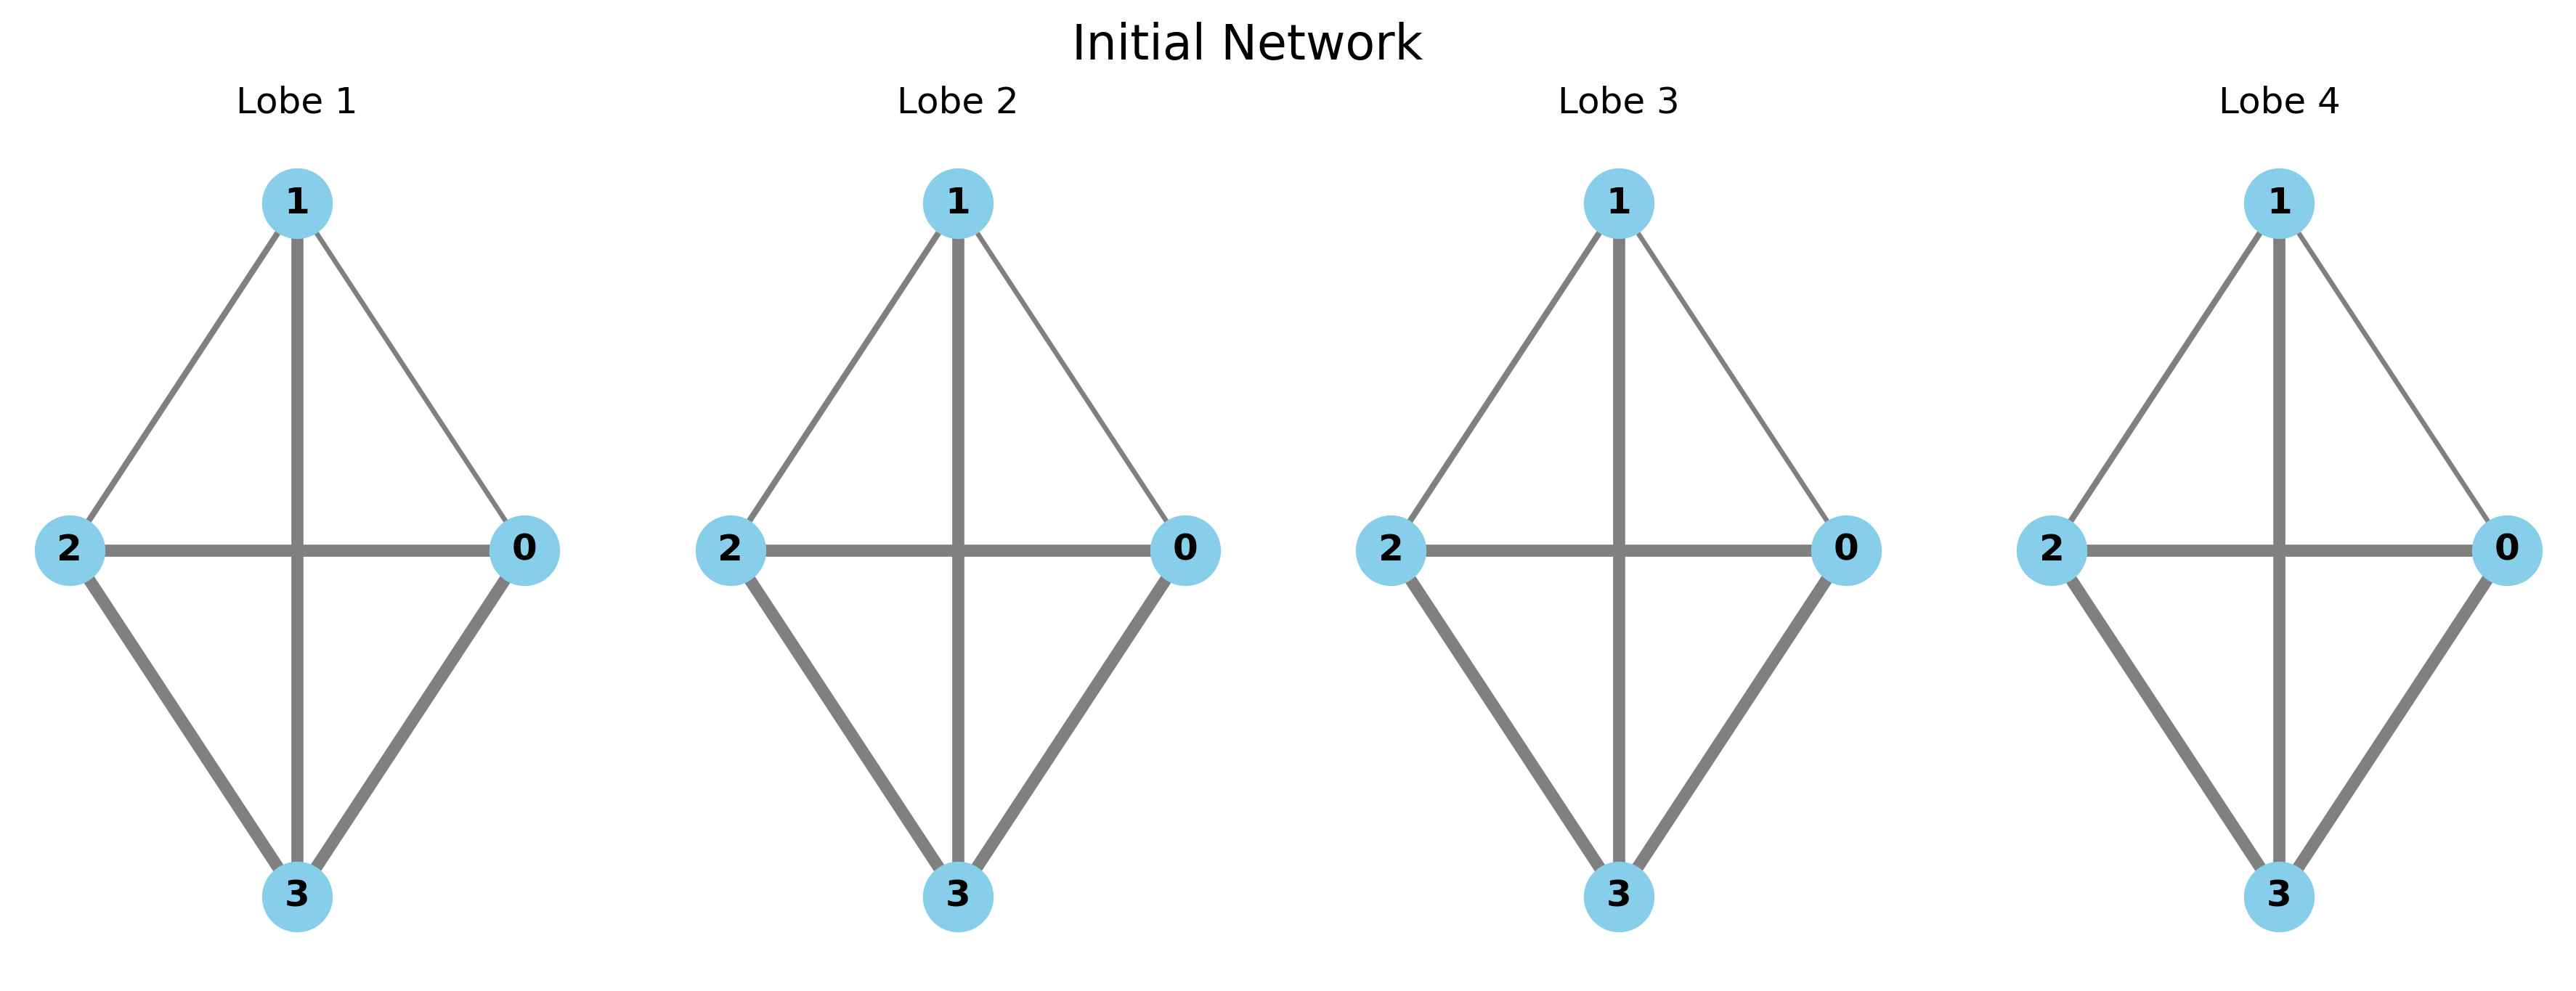

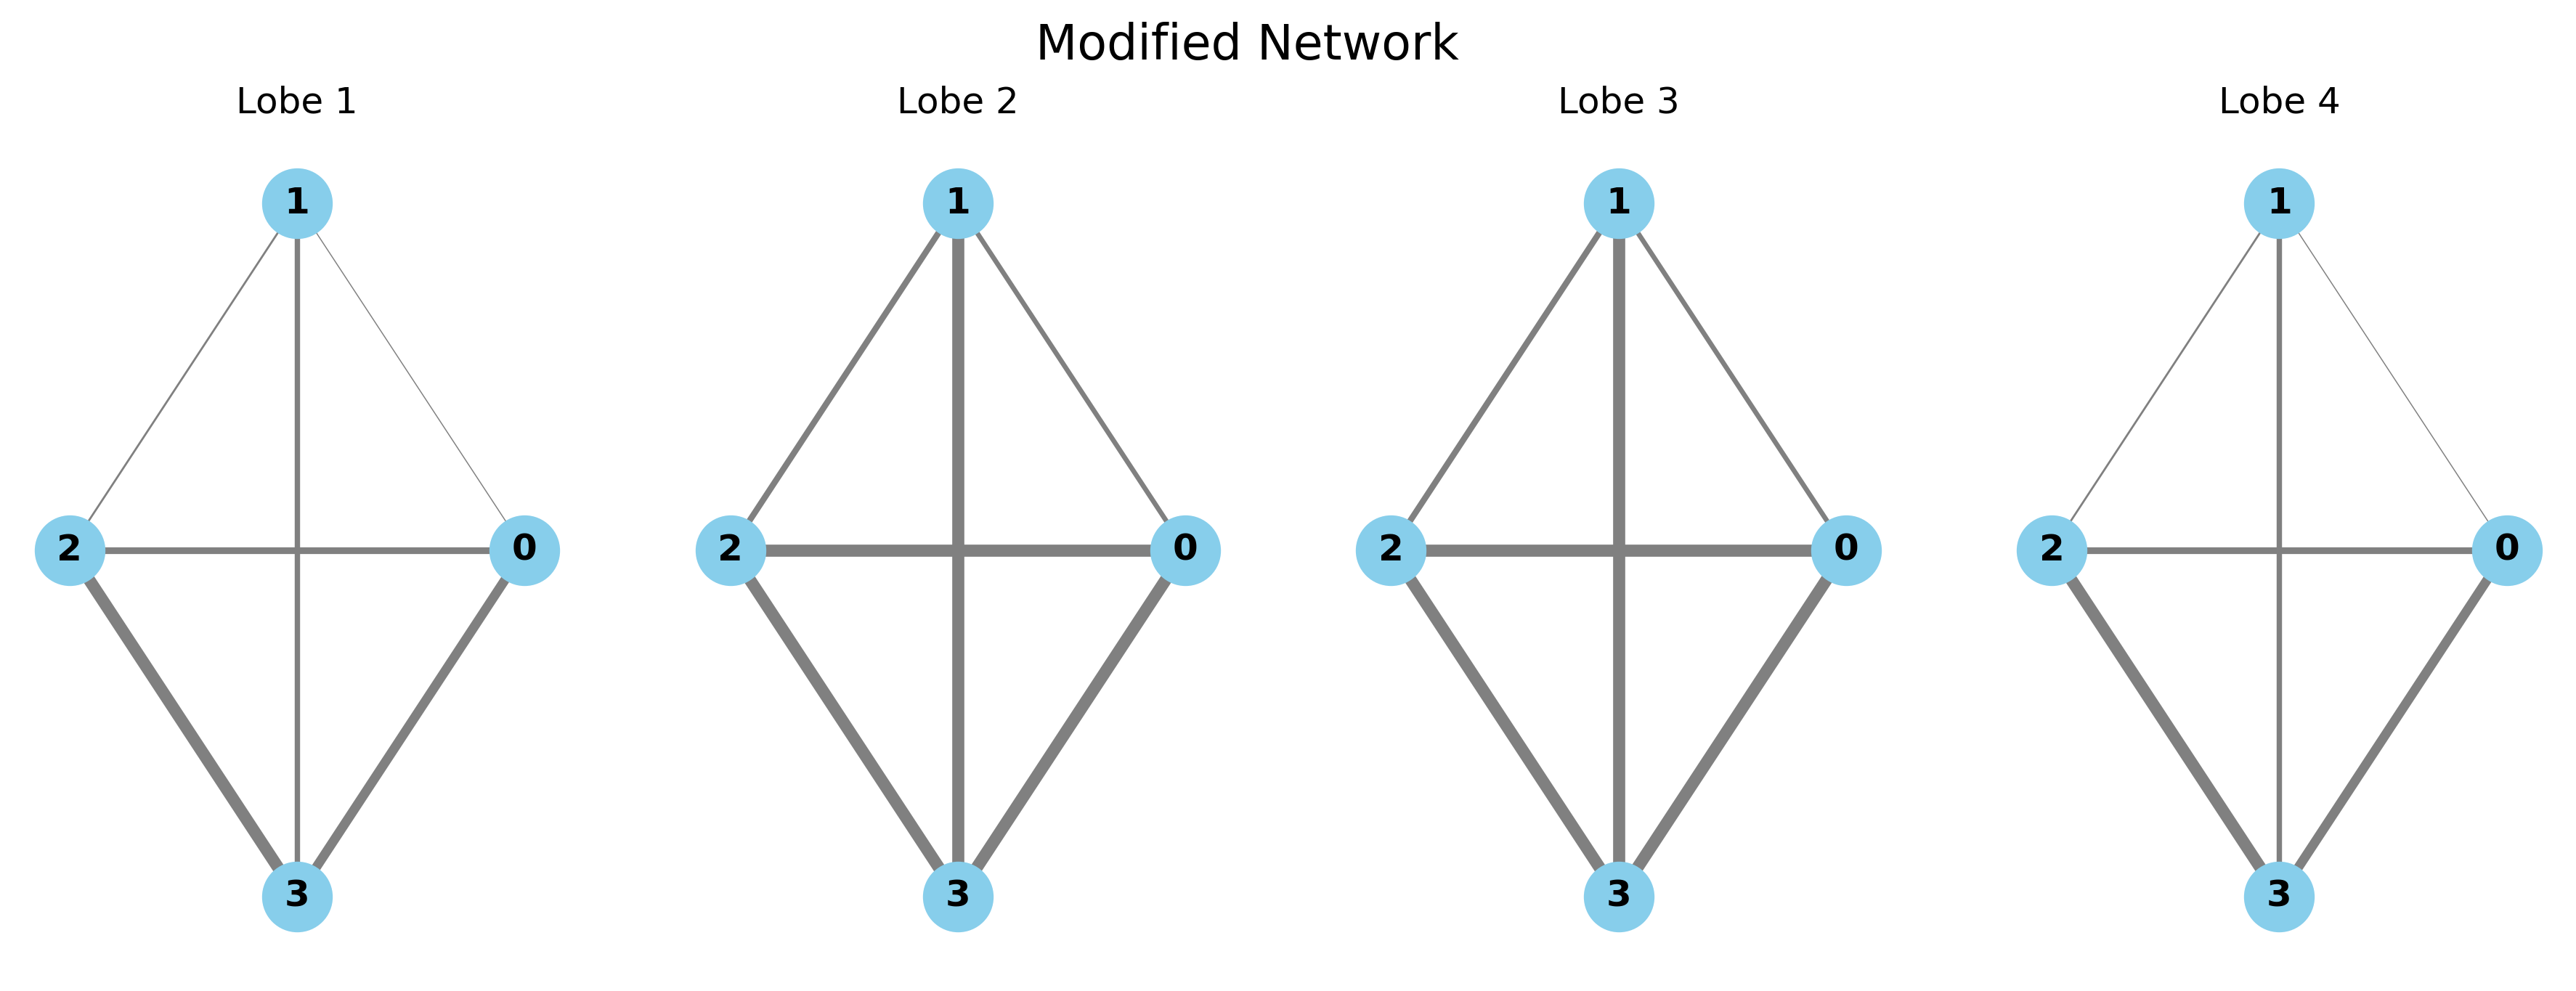

In [55]:
import matplotlib.pyplot as plt
import networkx as nx

# Define a function to visualize a network with thicker lines
def visualize_network3(adjacency_tensor, title, dpi=300, line_thickness=4):
    num_nodes = len(adjacency_tensor)

    # Create a graph for each layer in the adjacency tensor
    graphs = [nx.from_numpy_array(adjacency_tensor[i]) for i in range(num_nodes)]

    # Define positions for nodes (e.g., circular layout)
    positions = nx.circular_layout(graphs[0])

    # Set up a high-resolution figure with defined DPI
    plt.figure(figsize=(15, 5), dpi=dpi)
    plt.suptitle(title, fontsize=16)  # Increased title font size for clarity

    # Plot each graph
    for i in range(num_nodes):
        plt.subplot(1, num_nodes, i + 1)
        G = graphs[i]
        edge_weights = nx.get_edge_attributes(G, 'weight')

        # Normalized edge weights, scaled for thicker lines
        normalized_edge_weights = (
            #[weight / max(edge_weights.values()) * line_thickness if edge_weights else line_thickness
            [weight / max(edge_weights.values()) * line_thickness if edge_weights else weight*line_thickness for weight in edge_weights.values()]

             #for weight in edge_weights.values()]
        )

        # Draw the graph with thicker edges
        nx.draw(
            G,
            positions,
            with_labels=True,
            font_weight='bold',
            node_color='skyblue',
            edge_color='gray',
            node_size=500,
            font_size=12,
            width=normalized_edge_weights,  # Set the edge thickness
        )
        plt.title(f"Lobe {i + 1}", fontsize=12)

    # Display the plot
    plt.show()

visualize_network3(initial_adjacency_tensor, "Initial Network")
visualize_network3(modified_adjacency_tensor, "Modified Network")

[array([[0.  , 0.5 , 0.08, 0.15],
       [0.08, 0.  , 0.14, 1.  ],
       [0.5 , 0.15, 0.  , 0.05],
       [0.7 , 0.4 , 0.9 , 0.  ]]), array([[0.  , 0.1 , 0.04, 0.05],
       [0.04, 0.  , 0.01, 0.1 ],
       [0.1 , 0.05, 0.  , 0.05],
       [0.1 , 0.1 , 0.1 , 0.  ]]), array([[0. , 1. , 0.4, 0.5],
       [0.4, 0. , 0.1, 1. ],
       [1. , 0.5, 0. , 0.5],
       [1. , 1. , 1. , 0. ]]), array([[0.  , 0.5 , 0.08, 0.15],
       [0.08, 0.  , 0.12, 1.  ],
       [0.5 , 0.15, 0.  , 0.05],
       [0.7 , 0.4 , 0.9 , 0.  ]])]


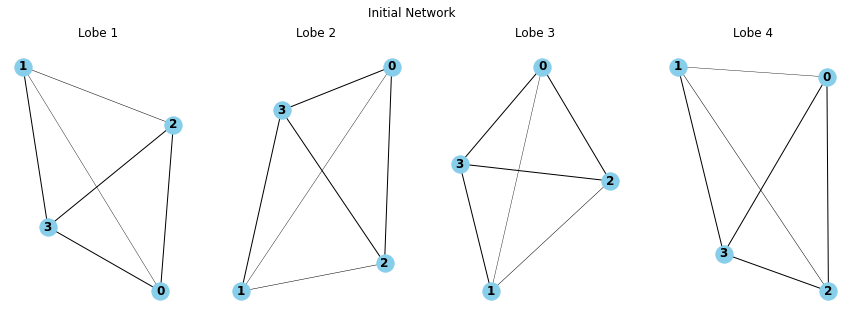

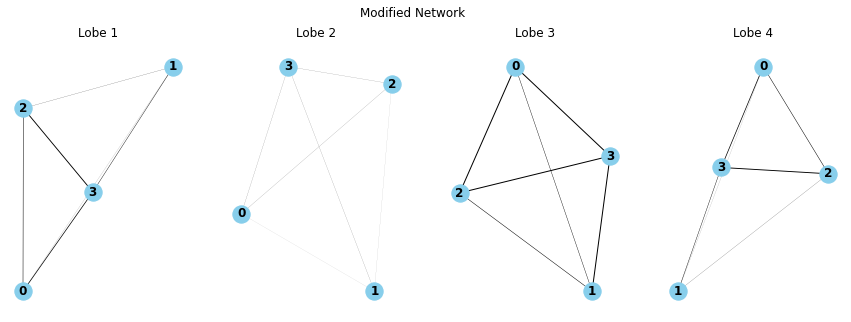

In [20]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def create_initial_adjacency_tensor(num_nodes):
    initial_adjacency_tensor = []
    for _ in range(num_nodes):
        initial_matrix = np.array([[0, 1, 0.4, 0.5], [0.4, 0, 0.1, 1], [1, 0.5, 0, 0.5], [1, 1, 1, 0]])
        initial_adjacency_tensor.append(initial_matrix)
    return initial_adjacency_tensor

def modify_adjacency_tensor(adjacency_tensor, modifying_tensors):
    modified_adjacency_tensor = []
    for i, initial_matrix in enumerate(adjacency_tensor):
        modifying_matrix = modifying_tensors[i]

        # Ensure the modifying matrix has the same shape as the initial matrix
        if modifying_matrix.shape != initial_matrix.shape:
            raise ValueError(f"Shapes of modifying matrix and initial matrix do not match for node {i + 1}.")

        # Apply modifications
        modified_matrix = initial_matrix * modifying_matrix
        modified_adjacency_tensor.append(modified_matrix)

    return modified_adjacency_tensor

def visualize_network(adjacency_tensor, title):
    num_nodes = len(adjacency_tensor)

    # Create a graph for each layer
    graphs = [nx.from_numpy_matrix(adjacency_tensor[i]) for i in range(num_nodes)]

    # Plot the graphs
    plt.figure(figsize=(15, 5))
    plt.suptitle(title)

    for i in range(num_nodes):
        plt.subplot(1, num_nodes, i + 1)
        G = graphs[i]
        pos = nx.spring_layout(G)
        edge_weights = nx.get_edge_attributes(G, 'weight')
        normalized_edge_weights = [weight / max(edge_weights.values()) for weight in edge_weights.values()]
        nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', width=list(edge_weights.values()))
        plt.title(f"Lobe {i + 1}") # Node

    plt.show()

# Number of nodes
num_nodes = 4

# Create the initial adjacency tensor
initial_adjacency_tensor = create_initial_adjacency_tensor(num_nodes)

# Define modifying tensors for each layer
modifying_tensors = [
    np.array([[0.8, 0.5, 0.2, 0.3], [0.2, 0.7, 1.4, 1.0], [0.5, 0.3, 0.8, 0.1], [0.7, 0.4, 0.9, 0.5]]),
    np.array([[0.1, 0.1, 0.1, 0.1], [0.1, 0.1, 0.1, 0.1], [0.1, 0.1, 0.1, 0.1], [0.1, 0.1, 0.1, 0.1]]),
    np.array([[1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1]]), # the identity matrix
    np.array([[0.8, 0.5, 0.2, 0.3], [0.2, 0.7, 1.2, 1.0], [0.5, 0.3, 0.8, 0.1], [0.7, 0.4, 0.9, 0.5]])
]

# Make sure the number of modifying tensors matches the number of nodes
if len(modifying_tensors) != num_nodes:
    raise ValueError(f"The number of modifying tensors ({len(modifying_tensors)}) must match the number of nodes ({num_nodes}).")

# Adjust the shape of the modifying matrix for the first layer
modifying_tensors[0] = modifying_tensors[0][:initial_adjacency_tensor[0].shape[0], :]

# Modify the adjacency tensor
modified_adjacency_tensor = modify_adjacency_tensor(initial_adjacency_tensor, modifying_tensors)
print(modified_adjacency_tensor)

# Visualize the initial and modified networks
visualize_network(initial_adjacency_tensor, "Initial Network")
visualize_network(modified_adjacency_tensor, "Modified Network")


The nodes here are the four lobes. In each lobe, there are (for the sake of simplicity) four nodes, representing neural masses, or hubs. The edges between them are the element of the overall adjacency matrix. For the sake of simplicity, we considered here the same matrix structure for the connections in each lobe. Then, we apply different parts of the K-operator, in form of 4x4 matrices acting elementwise. They can strengthen the weights of the connections, weaken them, or leave them unchanged.

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# Define a function to visualize a network with thicker lines
def visualize_network3(adjacency_tensor, title, dpi=300, line_thickness=4):
    num_nodes = len(adjacency_tensor)

    # Create a graph for each layer in the adjacency tensor
    graphs = [nx.from_numpy_matrix(adjacency_tensor[i]) for i in range(num_nodes)]

    # Define positions for nodes (e.g., circular layout)
    positions = nx.circular_layout(graphs[0])

    # Set up a high-resolution figure with defined DPI
    plt.figure(figsize=(15, 5), dpi=dpi)
    plt.suptitle(title, fontsize=16)  # Increased title font size for clarity

    # Plot each graph
    for i in range(num_nodes):
        plt.subplot(1, num_nodes, i + 1)
        G = graphs[i]
        edge_weights = nx.get_edge_attributes(G, 'weight')

        # Normalized edge weights, scaled for thicker lines
        normalized_edge_weights = (
            [weight / max(edge_weights.values()) * line_thickness if edge_weights else line_thickness 
             for weight in edge_weights.values()]
        )

        # Draw the graph with thicker edges
        nx.draw(
            G,
            positions,
            with_labels=True,
            font_weight='bold',
            node_color='skyblue',
            edge_color='gray',
            node_size=500,
            font_size=12,
            width=normalized_edge_weights,  # Set the edge thickness
        )
        plt.title(f"Lobe {i + 1}", fontsize=12)

    # Display the plot
    plt.show()
 

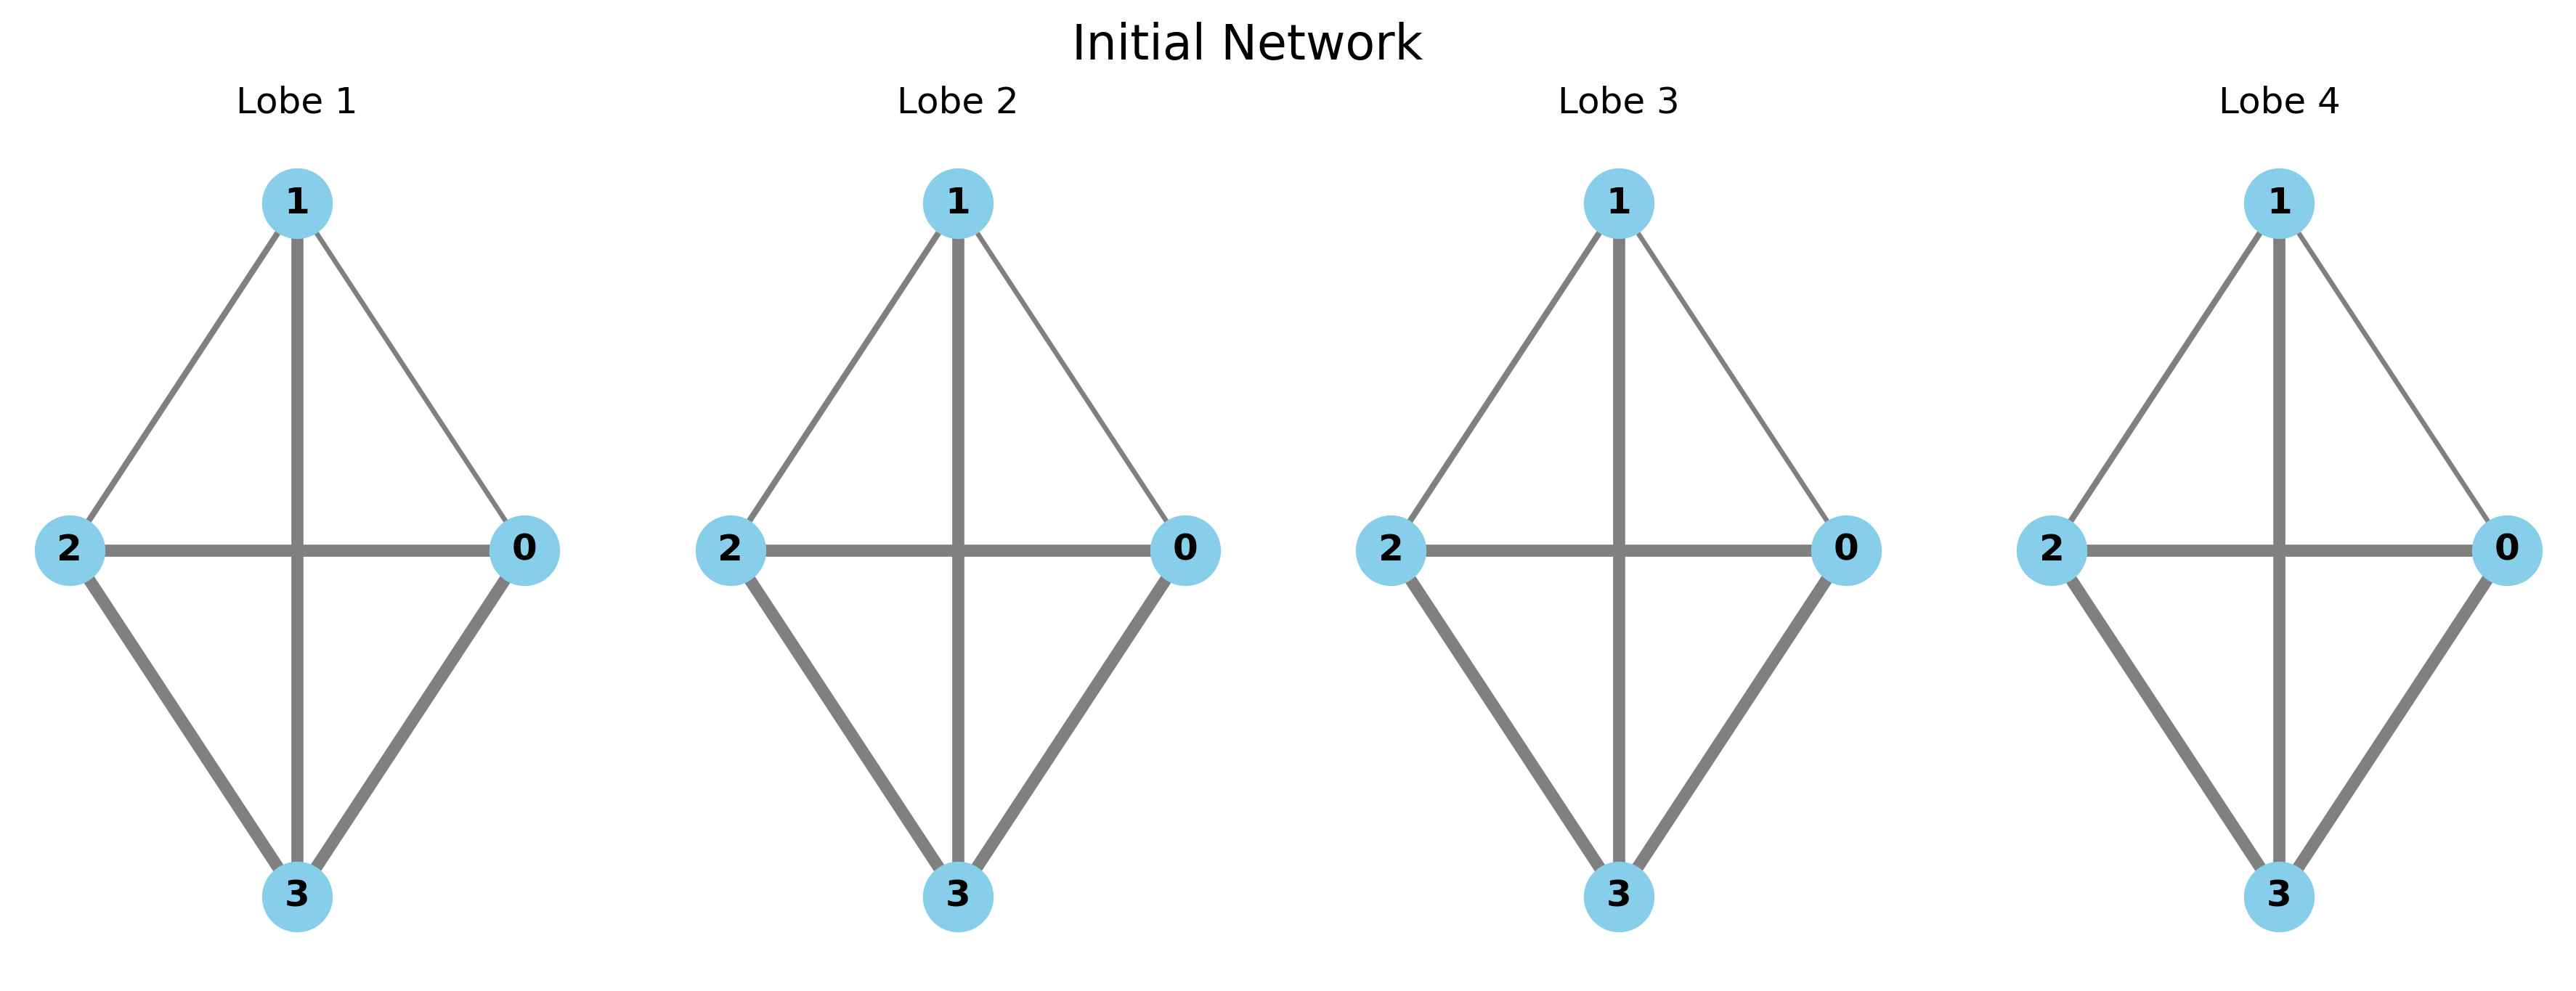

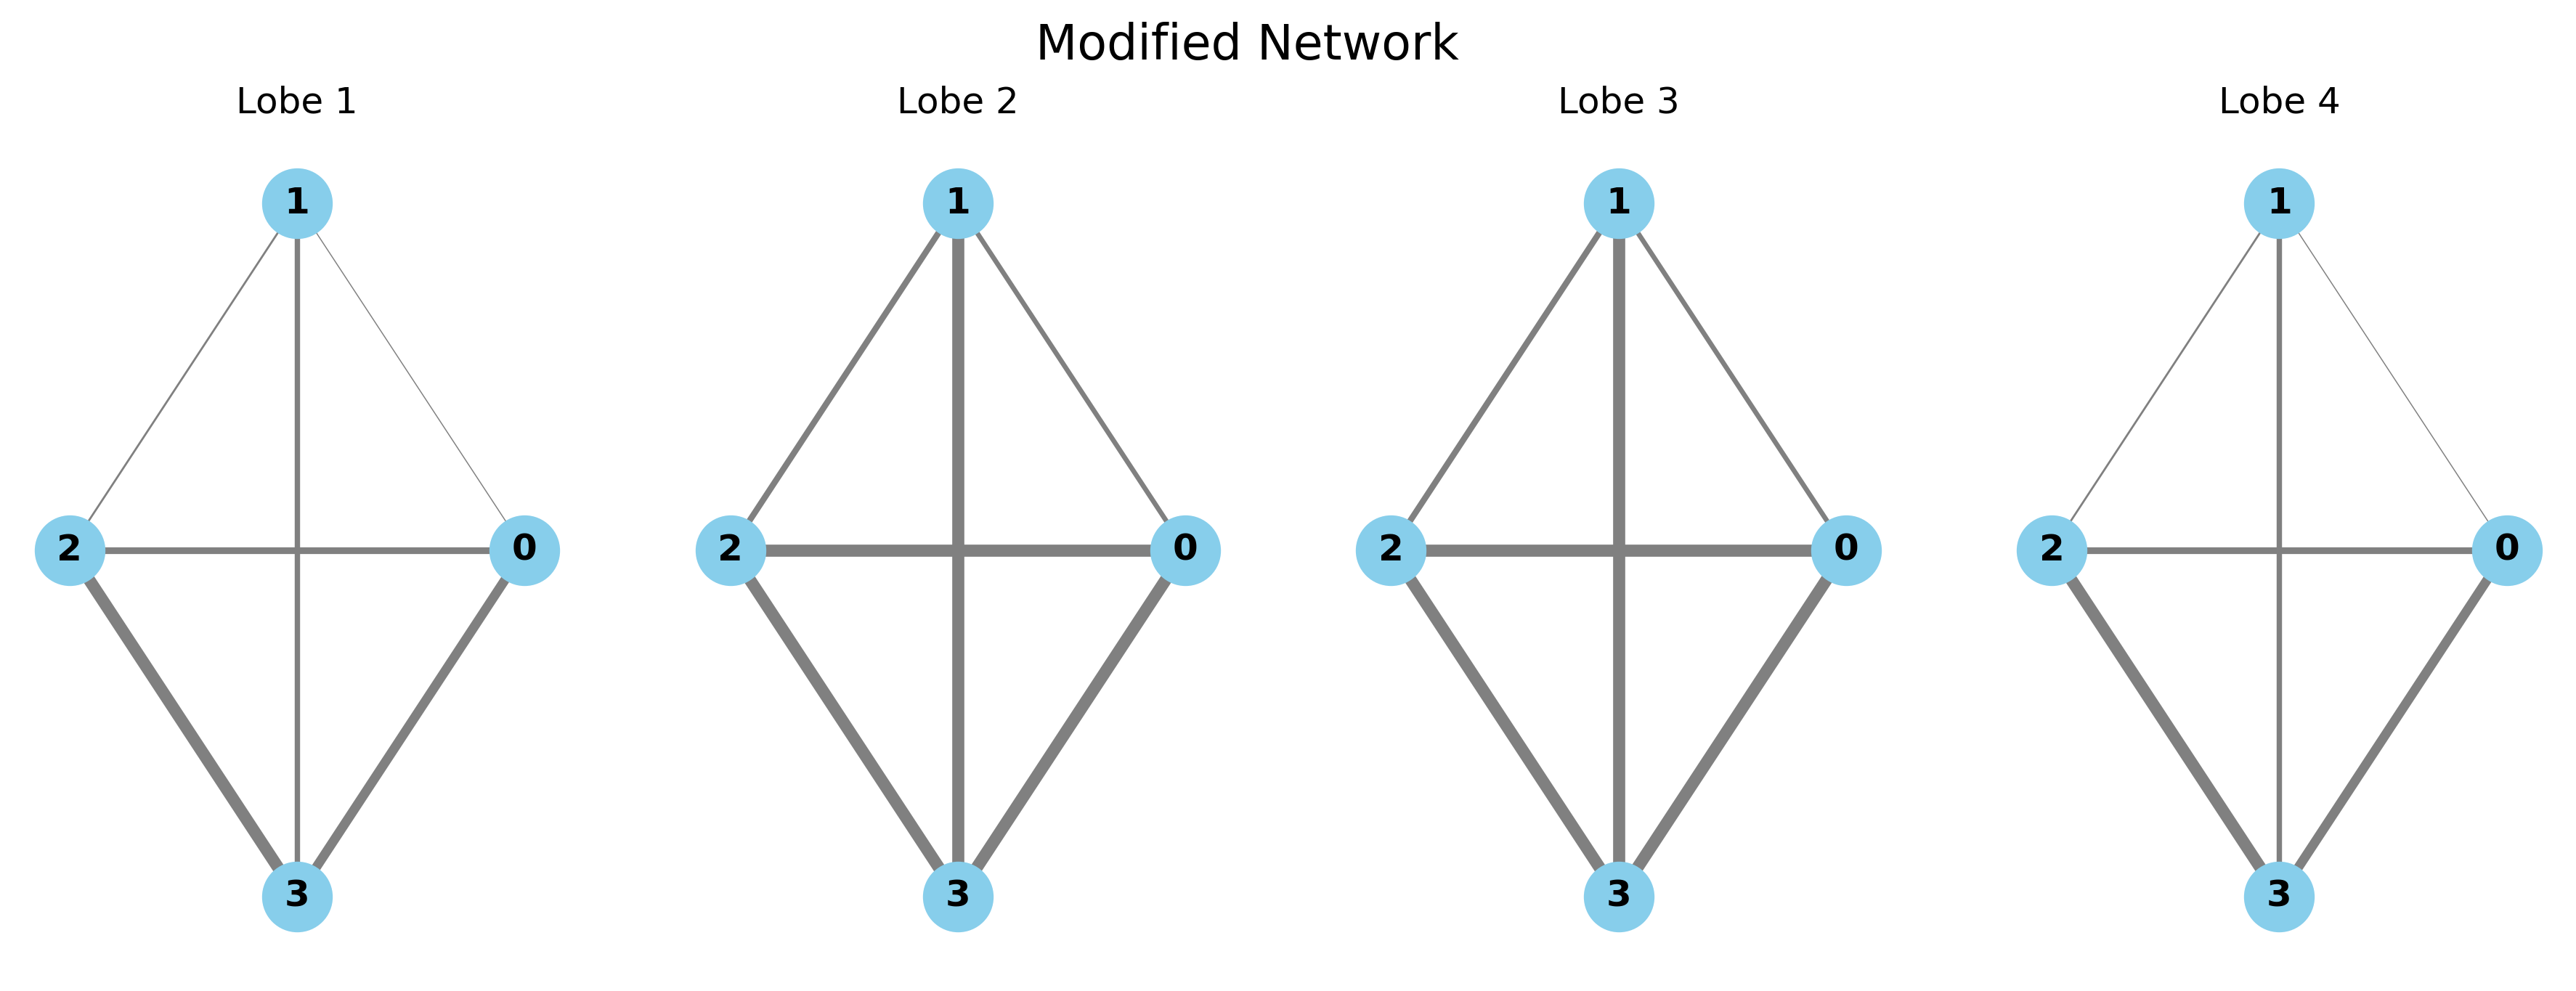

In [16]:
   
# Visualize the initial and modified networks
visualize_network3(initial_adjacency_tensor, "Initial Network")
visualize_network3(modified_adjacency_tensor, "Modified Network")

